In [0]:
!pip install kerassurgeon

In [0]:
import numpy as np
import tensorflow as tf
from keras.datasets import cifar10
from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, GlobalAveragePooling2D

from kerassurgeon import identify 
from kerassurgeon.operations import delete_channels,delete_layer


Using TensorFlow backend.


In [0]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [0]:
print('Number of images in Test Set = {}\nNumber of images in Training Set = {}'.format(x_test.shape[0],x_train.shape[0]))
print('Number of classes in Data Set = {}'.format(np.unique(y_train).shape[0]))

Number of images in Test Set = 10000
Number of images in Training Set = 50000
Number of classes in Data Set = 10


In [0]:
print(y_train[2])
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)
print(y_train[2])

[9]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [0]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()



# my_model = Sequential()

# my_model.add(Conv2D(32,(3,3),activation='relu',input_shape=x_train.shape[1:]))

# my_model.add(MaxPooling2D(pool_size=(2,2)))

# my_model.add(Conv2D(32,(3,3),activation='relu'))

# my_model.add(MaxPooling2D(pool_size=(2,2)))

# my_model.add(Conv2D(64,(3,3),activation='relu'))

# my_model.add(MaxPooling2D(pool_size=(2,2)))

# my_model.add(GlobalAveragePooling2D())
# my_model.add(Dense(10,activation='softmax'))

my_model = Sequential()
my_model.add(Conv2D(32, (3, 3), padding='same',activation='relu',
                 input_shape=x_train.shape[1:]))

my_model.add(Conv2D(32, (3, 3),activation='relu'))

my_model.add(MaxPooling2D(pool_size=(2, 2)))
my_model.add(Dropout(0.25))

my_model.add(Conv2D(64, (3, 3), padding='same',activation='relu'))

my_model.add(Conv2D(64, (3, 3),activation='relu',))

my_model.add(MaxPooling2D(pool_size=(2, 2)))
my_model.add(Dropout(0.25))

my_model.add(Flatten())
my_model.add(Dense(512,activation='relu',))

my_model.add(Dropout(0.5))
my_model.add(Dense(10,activation='softmax',))

# my_model.summary()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

my_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
my_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)         

In [0]:
x_train = x_train/255.
x_test = x_test/255.

In [0]:

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
my_model.fit(x_train, y_train, batch_size=32, epochs=1, verbose=1, validation_split=0.2, shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 40000 samples, validate on 10000 samples
Epoch 1/1



40000/40000 [==============================] - 217s 5ms/step - loss: 1.5525 - acc: 0.4311 - val_loss: 1.2143 - val_acc: 0.5677


In [0]:
score_train = my_model.evaluate(x_train,y_train) 

print('Accuracy on the Train Images: ', score_train[1])

score_test = my_model.evaluate(x_test, y_test)

print('Accuracy on the Test Images: ', score_test[1])

50000/50000 [==============================] - 61s 1ms/step
Accuracy on the Train Images:  0.58158
10000/10000 [==============================] - 12s 1ms/step
Accuracy on the Test Images:  0.5705


In [0]:
all_conv_layers = list()
count = 0
for each_layer in (my_model.layers):
  # print(each_layer.name)
  if(each_layer.name[0:6] == 'conv2d'):
    all_conv_layers.append(count)
  count += 1
print(all_conv_layers)


[0, 1, 4, 5]


32
L1 norm of conv2D_1 layer [('filt25', 1.604068), ('filt19', 1.629856), ('filt1', 1.6967067), ('filt26', 1.7560904), ('filt17', 1.8304945), ('filt5', 1.8432654), ('filt15', 1.870438), ('filt6', 1.8927829), ('filt16', 1.9032553), ('filt24', 1.910784), ('filt0', 1.9250474), ('filt20', 1.9535578), ('filt29', 1.9550542), ('filt23', 1.9873433), ('filt8', 2.0134292), ('filt28', 2.0713162), ('filt12', 2.0788107), ('filt3', 2.0833595), ('filt30', 2.0958974), ('filt31', 2.1074965), ('filt9', 2.131464), ('filt13', 2.140316), ('filt14', 2.1537013), ('filt11', 2.1572273), ('filt18', 2.1732242), ('filt22', 2.2438009), ('filt4', 2.3314164), ('filt2', 2.3328774), ('filt21', 2.3380635), ('filt7', 2.385539), ('filt27', 2.4066787), ('filt10', 2.4692094)]
32
L1 norm of conv2D_2 layer [('filt10', 15.412056), ('filt12', 15.600311), ('filt19', 16.4622), ('filt23', 16.570984), ('filt22', 16.599606), ('filt20', 16.704231), ('filt31', 16.759628), ('filt15', 16.933258), ('filt14', 16.978899), ('filt26', 17.05

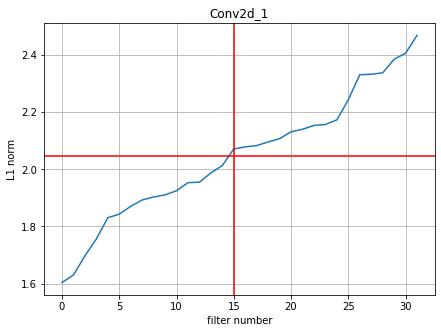

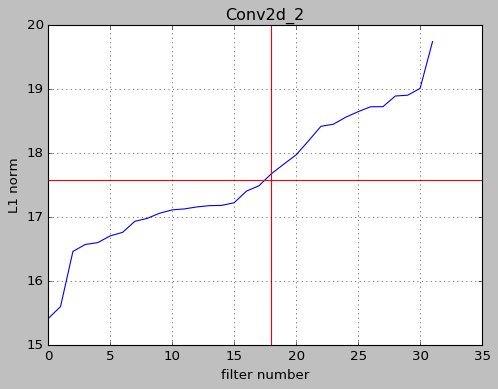

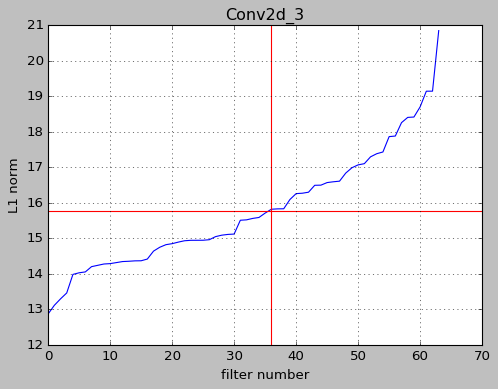

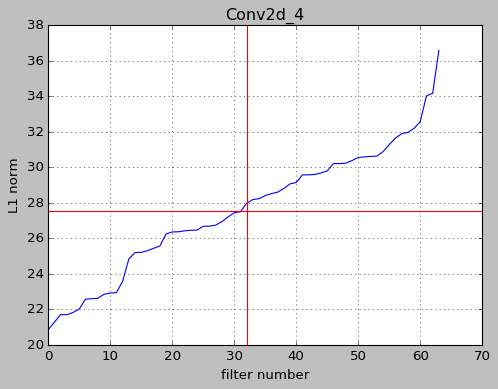

In [0]:
weights = list()

for i in all_conv_layers:
  weights.append(my_model.layers[i].get_weights()[0])

layer_wise_filter_sorted = list()
layer_wise_filter_sorted_values = list()
for i in range(len(weights)):
  weight =  weights[i]
  num_filters = len(weight[0,0,0,:])
  print(num_filters)
  weights_dict = dict()
  for j in range(num_filters):
    w_s = np.sum(abs(weight[:,:,:,j]))
    filt = 'filt{}'.format(j)
    weights_dict[filt] = w_s

  weights_dict_sort = sorted(weights_dict.items(),key = lambda kv:kv[1])
  print('L1 norm of conv2D_{} layer'.format(i+1),weights_dict_sort)

  weight_values = list()
  filter_indices = list()

  for element in weights_dict_sort:
    filter_indices.append(int(element[0][4:]))
    weight_values.append(element[1])
  layer_wise_filter_sorted.append(filter_indices)
  layer_wise_filter_sorted_values.append(weight_values)
  x = np.arange(num_filters)
  plt.figure(i+1,figsize=(7,5))
  plt.plot(x,np.array(weight_values))
  plt.axhline(y=np.mean(np.array(weight_values)),c='r')
  for j in range(len(layer_wise_filter_sorted_values[i])):
    if(np.mean(np.array(weight_values)) < weight_values[j]):
        plt.axvline(x=j,c='r')
        break

  plt.xlabel('filter number')
  plt.ylabel('L1 norm')
  plt.title('Conv2d_{}'.format(i+1))
  plt.grid(True)
  plt.style.use(['classic'])
# print(np.array(weight_values),'\n',x) [22,24,2,29,23,13,0,14,26,21]
print(layer_wise_filter_sorted)
print(layer_wise_filter_sorted_values)

In [0]:
thresh_holds = list()
for i in range(len(all_conv_layers)):
  # print(np.mean(np.array(layer_wise_filter_sorted_values[i])))
  thresh_holds.append(np.mean(np.array(layer_wise_filter_sorted_values[i])))
prune_filter_indices = list()
for i in range(len(all_conv_layers)):
  for j in range(len(layer_wise_filter_sorted_values[i])):
    if(thresh_holds[i] < layer_wise_filter_sorted_values[i][j]):
      prune_filter_indices.append(j)
      break

In [0]:
prune_filter_indices

[15, 18, 36, 32]

In [0]:

layer_indexes = []
pruning_layers = list()
layer_indexes.append(all_conv_layers[0])

for i in range(1,len(all_conv_layers)):
    layer_indexes.append(all_conv_layers[i])
print(layer_indexes)

for i in layer_indexes:
    pruning_layers.append(my_model.layers[i])

from kerassurgeon import Surgeon
surgeon = Surgeon(my_model)
# [0, 1, 4, 5]
for j,i in enumerate(all_conv_layers):
    surgeon.add_job('delete_channels',my_model.layers[i],channels=layer_wise_filter_sorted[j][0:prune_filter_indices[j]])

model_new = surgeon.operate()

[0, 1, 4, 5]
Deleting 15/32 channels from layer: conv2d_1
Deleting 18/32 channels from layer: conv2d_2
Deleting 36/64 channels from layer: conv2d_3
Deleting 32/64 channels from layer: conv2d_4
Deleting 12/512 channels from layer: dense_1


In [0]:
model_new.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_input (InputLayer)  (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 17)        476       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 14)        2156      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 multiple                  0         
_________________________________________________________________
dropout_1 (Dropout)          multiple                  0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 28)        3556      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 32)        8096

In [0]:
model_new.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
score_train = model_new.evaluate(x_train,y_train) 

print('Accuracy on the Train Images: ', score_train[1])

score_test = model_new.evaluate(x_test, y_test)

print('Accuracy on the Test Images: ', score_test[1])

50000/50000 [==============================] - 37s 736us/step
Accuracy on the Train Images:  0.18554
10000/10000 [==============================] - 7s 736us/step
Accuracy on the Test Images:  0.1813


In [0]:
model_new.fit(x_train, y_train, batch_size=32, epochs=1, verbose=1, validation_split=0.2, shuffle=True)

Train on 40000 samples, validate on 10000 samples
Epoch 1/1
40000/40000 [==============================] - 115s 3ms/step - loss: 1.2632 - acc: 0.5499 - val_loss: 1.0665 - val_acc: 0.6170


In [0]:
score_train = model_new.evaluate(x_train,y_train) 

print('Accuracy on the Train Images: ', score_train[1])

score_test = model_new.evaluate(x_test, y_test)

print('Accuracy on the Test Images: ', score_test[1])

50000/50000 [==============================] - 38s 760us/step
Accuracy on the Train Images:  0.62888
10000/10000 [==============================] - 8s 753us/step
Accuracy on the Test Images:  0.6216
